`63070501061 S.RAKNA`

> 10 points. 1 hrs. 

# KNN (K nearest neighbor) for 3 Classes
Modify the provided program for KNN with 2 random red/blue classes shown in class to have **3 classes of red/blue/yellow** instead. Then use **K = 4** to classify a randomly generated sample as red, yellow, or blue.

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#Create Training

In [2]:
# Feature set containing 25 * 2 for 80 (x,y) values of known/training data that are random integers 0-99
trainData = np.random.randint(0, 100, (80, 2)).astype(np.float32)
# Label each one either Red or Blue with numbers 0 and 1. Response is a random integers 0-1 of 80 * 1 values
responses = np.random.randint(0, 3, (80, 1)).astype(
    np.float32)  # responses 25 x 1 matrix


In [3]:
print ("Training Data:\n", trainData)
print("\n Responses:\n", responses)
print("Responses Ravel or flattened as 1-D:\n", responses.ravel()) #Method .ravel flattens the np array to 1-D. 
print("Red Responses: \n ", responses.ravel()== 0) #color 0 is "Red", color 1 is blue

Training Data:
 [[61. 21.]
 [94. 34.]
 [27. 67.]
 [66. 42.]
 [67. 54.]
 [85. 81.]
 [78. 59.]
 [74. 40.]
 [58. 91.]
 [26. 47.]
 [ 1. 21.]
 [59. 24.]
 [22. 81.]
 [16. 21.]
 [82. 29.]
 [29. 35.]
 [35. 63.]
 [88. 50.]
 [52. 74.]
 [84. 92.]
 [ 4. 58.]
 [18.  7.]
 [46. 48.]
 [95. 31.]
 [75. 43.]
 [25. 71.]
 [65. 87.]
 [55. 40.]
 [41. 89.]
 [43. 45.]
 [68. 33.]
 [60. 47.]
 [53. 59.]
 [19. 59.]
 [71. 30.]
 [13. 50.]
 [82. 74.]
 [56. 85.]
 [45.  2.]
 [98. 56.]
 [32. 49.]
 [35. 67.]
 [94. 48.]
 [83. 36.]
 [14. 22.]
 [63. 20.]
 [96. 75.]
 [ 9. 81.]
 [14. 97.]
 [37. 12.]
 [52. 95.]
 [16. 65.]
 [23. 54.]
 [12. 98.]
 [19. 83.]
 [17. 13.]
 [13. 37.]
 [66.  5.]
 [16. 93.]
 [65. 98.]
 [10. 65.]
 [45. 42.]
 [29. 64.]
 [12. 73.]
 [90. 69.]
 [72. 27.]
 [88. 87.]
 [96. 42.]
 [10.  3.]
 [93. 54.]
 [37. 61.]
 [17. 17.]
 [13. 15.]
 [87. 33.]
 [73. 58.]
 [12. 18.]
 [93. 75.]
 [82. 88.]
 [42. 41.]
 [ 7. 36.]]

 Responses:
 [[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]

In [4]:
# Make red and blue and yellow points
# red is now trained data with responses of 0
red = trainData[responses.ravel() == 0]
print(red)


[[27. 67.]
 [78. 59.]
 [74. 40.]
 [35. 63.]
 [65. 87.]
 [41. 89.]
 [60. 47.]
 [13. 50.]
 [56. 85.]
 [45.  2.]
 [98. 56.]
 [35. 67.]
 [94. 48.]
 [ 9. 81.]
 [52. 95.]
 [66.  5.]
 [16. 93.]
 [65. 98.]
 [10. 65.]
 [45. 42.]
 [29. 64.]
 [90. 69.]
 [72. 27.]
 [96. 42.]
 [17. 17.]
 [82. 88.]]


In [5]:
# blue is now the trained data with responses of 1
blue = trainData[responses.ravel() == 1]
print(blue)


[[61. 21.]
 [94. 34.]
 [66. 42.]
 [67. 54.]
 [85. 81.]
 [58. 91.]
 [26. 47.]
 [ 1. 21.]
 [59. 24.]
 [16. 21.]
 [82. 29.]
 [ 4. 58.]
 [18.  7.]
 [95. 31.]
 [25. 71.]
 [96. 75.]
 [37. 12.]
 [12. 98.]
 [19. 83.]
 [17. 13.]
 [88. 87.]
 [10.  3.]
 [37. 61.]
 [87. 33.]
 [73. 58.]
 [93. 75.]
 [ 7. 36.]]


In [6]:
# yellow is now the trained data with responses of 2
yellow = trainData[responses.ravel() == 2]
print(yellow)

[[22. 81.]
 [29. 35.]
 [88. 50.]
 [52. 74.]
 [84. 92.]
 [46. 48.]
 [75. 43.]
 [55. 40.]
 [43. 45.]
 [68. 33.]
 [53. 59.]
 [19. 59.]
 [71. 30.]
 [82. 74.]
 [32. 49.]
 [83. 36.]
 [14. 22.]
 [63. 20.]
 [14. 97.]
 [16. 65.]
 [23. 54.]
 [13. 37.]
 [12. 73.]
 [93. 54.]
 [13. 15.]
 [12. 18.]
 [42. 41.]]


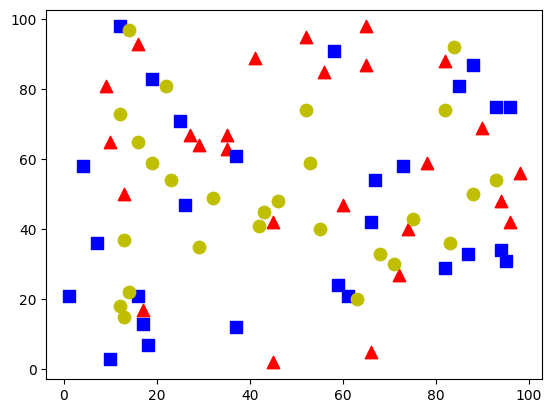

In [7]:
# matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, ...)
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')  # size 80, red, triangle
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')  # size 80, blue, square
plt.scatter(yellow[:, 0], yellow[:, 1], 80, 'y', 'o')  # size 80, yellow, circle
plt.show()


#Test Unknown Data

In [8]:
# create 1 * 2 or 1 (x,y) value with random integer 0-99
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
print(newcomer)


[[77. 60.]]


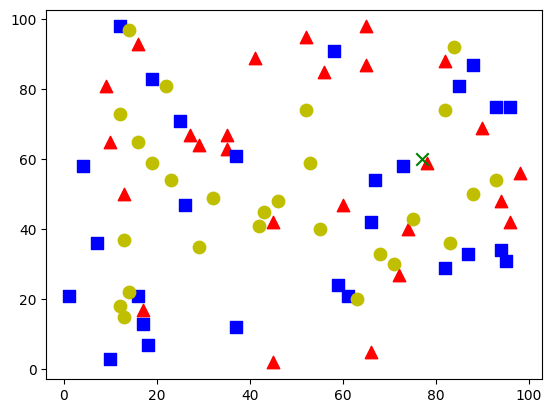

In [9]:
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')  # red, triangle
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')  # blue, square
plt.scatter(yellow[:, 0], yellow[:, 1], 80, 'y', 'o')  # yellow, circle
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'x')  # green, cross
plt.show()


In [10]:
colorName = np.array(['Red', 'Blue', 'Yellow'])


In [11]:
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
k = 4
ret, results, neighbors, dist = knn.findNearest(newcomer, k)


In [12]:
resultColor = colorName[results[0].astype(int)]
neighborColors = colorName[neighbors[0].astype(int)]


In [13]:
print("result color:  {}\n".format(resultColor))
print("neighbors:  {}\n".format(neighbors))
print("neighbor colors:  {}\n".format(neighborColors))
print("neighbor distances:  {}\n".format(dist[0]))


result color:  ['Blue']

neighbors:  [[0. 1. 1. 2.]]

neighbor colors:  ['Red' 'Blue' 'Blue' 'Yellow']

neighbor distances:  [  2.  20. 136. 221.]

